In [30]:
%matplotlib inline
import cv2
import time
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
img = cv2.imread('Ej/prueba.jpg',0)
from scipy import ndimage

#prueba = np.array([[0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,1,1],[0,0,0,0,0,0,0,0,0,1,1],[0,0,0,0,0,0,0,0,0,1,1],[0,0,0,1,1,0,0,0,0,1,1]])
kernel = np.array([[1,1,1],[0,1,0],[0,0,0]])
k1 = np.array([[0,0,0],[0,1,0],[1,1,1]])
k2 = np.array([[0,0,0],[1,1,0],[1,1,0]])
k3 = np.array([[1,0,0],[1,1,0],[1,0,0]])
k4 = np.array([[1,1,0],[1,1,0],[0,0,0]])
k5 = np.array([[1,1,1],[0,1,0],[0,0,0]])
k6 = np.array([[0,1,1],[0,1,1],[0,0,0]])
k7 = np.array([[0,0,1],[0,1,1],[0,0,1]])
k8 = np.array([[0,0,0],[0,1,1],[0,1,1]])

k21 = np.array([[1,1,1],[0,0,0],[0,0,0]])
k22 = np.array([[0,1,1],[0,0,1],[0,0,0]])
k23 = np.array([[0,0,1],[0,0,1],[0,0,1]])
k24 = np.array([[0,0,0],[0,0,1],[0,1,1]])
k25 = np.array([[0,0,0],[0,0,0],[1,1,1]])
k26 = np.array([[1,0,0],[1,1,0],[0,0,0]])
k27 = np.array([[1,0,0],[1,0,0],[1,0,0]])
k28 = np.array([[1,1,0],[1,0,0],[0,0,0]])
kernels=[[k1,k21],[k2,k22],[k3,k23],[k4,k24],[k5,k25],[k6,k26],[k7,k27],[k8,k28]]#,[k1,k21],[k2,k22],[k3,k23],[k4,k24],[k5,k25],[k6,k26],[k7,k27],[k8,k28],[k1,k21],[k2,k22],[k3,k23],[k4,k24],[k5,k25],[k6,k26],[k7,k27],[k8,k28]]

ret, binary = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

#erosion = cv2.erode(binary,np.uint8(kernel),iterations = 1)
#dilation = cv2.dilate(binary,np.uint8(kernel),iterations = 1)

#hit=ndimage.binary_hit_or_miss(binary, structure1=k1)

'''plt.figure(1,figsize=(15,15))
plt.grid(True)
plt.suptitle('Imagen Real: Ruido Distribucion Normal, media: 128, Des. Estandar: 20, Ventana 5x5')
plt.subplot(331), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen Original')
plt.subplot(332), plt.imshow(binary, cmap=plt.cm.gray), plt.title('binario')
plt.subplot(333), plt.imshow(erosion, cmap=plt.cm.gray), plt.title('erosion')
plt.subplot(334), plt.imshow(dilation, cmap=plt.cm.gray), plt.title('dilatacion')
plt.subplot(335), plt.imshow(binary+hit, cmap=plt.cm.gray), plt.title('hit')
'''
nuevoBinary=binary+hit
for i in kernels:
    hit=ndimage.binary_hit_or_miss(nuevoBinary, structure1=i[0],structure2=i[1])
    nuevoBinary=nuevoBinary+hit
#hit=ndimage.binary_hit_or_miss(nuevoBinary, structure1=k5)
#nuevoBinary=nuevoBinary+hit
#hit=ndimage.binary_hit_or_miss(nuevoBinary, structure1=k5)
 
plt.subplot(336), plt.imshow(nuevoBinary, cmap=plt.cm.gray), plt.title('hit resta')




TypeError: unsupported operand type(s) for +: 'NoneType' and 'bool'

(<matplotlib.axes._subplots.AxesSubplot at 0x2c7633c8>,
 <matplotlib.text.Text at 0x2c5d9eb8>)

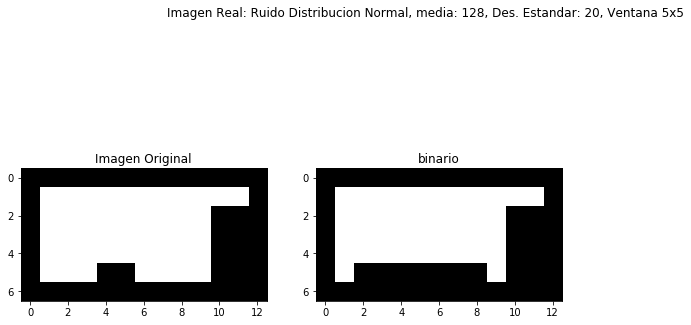

In [35]:
img = cv2.imread('Ej/prueba.png',0)
ret,t1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ker1 = np.array([[1,1,1],[0,1,0],[0,0,0]])
ker2 = np.array([[0,0,0],[0,0,0],[1,1,1]])
hit2=ndimage.binary_hit_or_miss(t1, structure1=ker1,structure2=ker2)
plt.figure(1,figsize=(15,15))
plt.grid(True)
plt.suptitle('Imagen Real: Ruido Distribucion Normal, media: 128, Des. Estandar: 20, Ventana 5x5')
plt.subplot(331), plt.imshow(t1, cmap=plt.cm.gray), plt.title('Imagen Original')
plt.subplot(332), plt.imshow(t1+hit2, cmap=plt.cm.gray), plt.title('binario')
#plt.subplot(333), plt.imshow(erosion, cmap=plt.cm.gray), plt.title('erosion')
#plt.subplot(334), plt.imshow(dilation, cmap=plt.cm.gray), plt.title('dilatacion')
#plt.subplot(335), plt.imshow(binary+hit, cmap=plt.cm.gray), plt.title('hit')

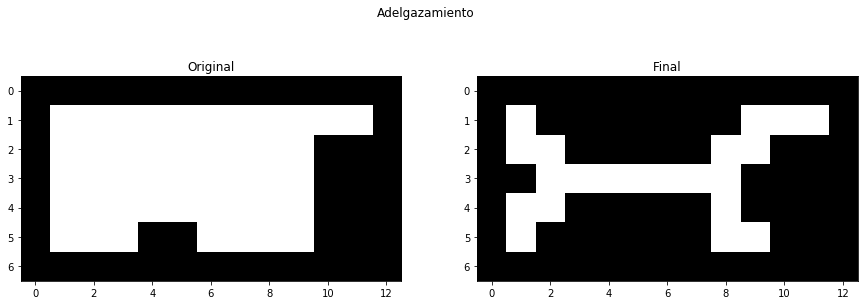

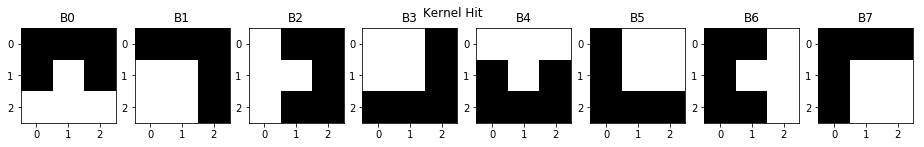

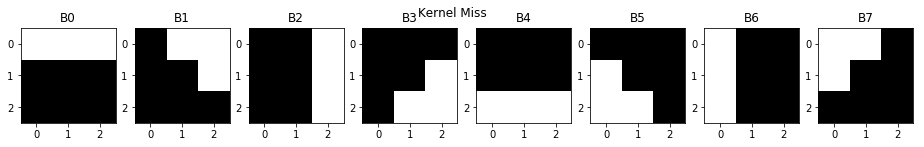

In [51]:
from scipy import ndimage

def createKernel():
    
    kernelhit = np.array([[0,0,0],[0,1,0],[1,1,1]], int)
    kernelhit2 = np.array([[0,0,0],[1,1,0],[1,1,0]], int)
    kernelmiss = np.array([[1,1,1],[0,0,0],[0,0,0]], int)
    kernelmiss2 = np.array([[0,1,1],[0,0,1],[0,0,0]], int)
    
    rotation = []
    rotationInv = []

    for i in range(8):
        rotation.append(np.zeros((3,3)))
        rotationInv.append(np.zeros((3,3)))
        if(i % 2 == 0):            
            rotation[i] += kernelhit
            kernelhit = np.rot90(kernelhit,-1)        
            rotationInv[i] += kernelmiss
            kernelmiss = np.rot90(kernelmiss,-1)
        else:            
            rotation[i] += kernelhit2
            kernelhit2 = np.rot90(kernelhit2,-1)         
            rotationInv[i] += kernelmiss2
            kernelmiss2 = np.rot90(kernelmiss2,-1)

    return rotation,rotationInv

def thinning(binary, rotation,rotationInv):
        
    res=np.zeros((binary.shape))
    plt.figure(1,figsize=(15,5))
    
    while True:
        actual=binary.copy()
        
        for i in range(8):  
            res = ndimage.binary_hit_or_miss(binary, structure1=rotation[i],structure2=rotationInv[i])
            binary =np.uint8(binary+res)
            
        if( not(np.bitwise_xor(actual,binary).any())):
            return binary
        
    
    
            

img = cv2.imread('Ej/prueba.png',0)
ret, original = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
rotation, rotationInv = createKernel()
skeleton=thinning(original,rotation,rotationInv)




plt.figure(1,figsize=(10,5))
plt.suptitle("Adelgazamiento")
plt.subplot(121), plt.imshow(original, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(122), plt.imshow(skeleton, cmap=plt.cm.gray), plt.title('Final')
plt.figure(2,figsize=(16,2))
plt.suptitle("Kernel Hit")
for i in range(8):
    plt.subplot(181+i), plt.imshow(rotation[i], cmap=plt.cm.gray), plt.title('B'+str(i))
plt.figure(3,figsize=(16,2))
plt.suptitle("Kernel Miss")
for i in range(8):
    plt.subplot(181+i), plt.imshow(rotationInv[i], cmap=plt.cm.gray), plt.title('B'+str(i))



(<matplotlib.axes._subplots.AxesSubplot at 0xb3a5160>,
 <matplotlib.text.Text at 0x1bd9b160>)

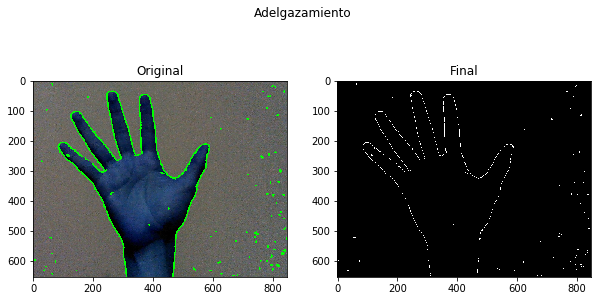

In [4]:
%matplotlib inline
import cv2
import time
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
img = cv2.imread('Ej/ex1.jpg')
from scipy import ndimage
thresh=255

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
canny_output= cv2.Canny( gray,100,200,apertureSize = 3 );
im2,contours, hierarchy= cv2.findContours( canny_output , cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE );
cv2.drawContours(img, contours, -1, (0,255,0), 3)

for i in contours:
mu[i] = moments( contours[i], false ); }

plt.figure(1,figsize=(10,5))
plt.suptitle("Adelgazamiento")
plt.subplot(121), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(122), plt.imshow(canny_output, cmap=plt.cm.gray), plt.title('Final')